In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
plt.style.use('ggplot')
import pandasql as ps  ##SQLite
import scipy.stats as stats
import os
from sklearn.model_selection import train_test_split
import pickle

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
# plt.style.use('ggplot')

In [2]:
## import dataset
feeds = pd.read_csv("data/feeds.csv")
# tables = pd.read_csv("data/tables.csv")
users = pd.read_csv("data/users.csv")
videos = pd.read_csv("data/videos.csv")
watchedVideo = pd.read_csv("data/watchedVideo.csv")


In [3]:
feeds.head(50)

,Unnamed: 0,id,name
0,0,27a87df4-da75-451f-b8f6-af9dd0a4ee00,music
1,1,42568c8a-efbe-4293-81a3-513e33094ade,fashion
2,2,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,sports
3,3,c9d59470-c4ee-43ff-831d-b52508c8d848,games
4,4,582520b2-b30a-4ecb-b1b4-1806672fcfc4,travel
5,5,a8a04865-55d4-4de4-8141-b273b678299f,fun
6,6,644a3cb6-e266-4757-9e96-a3ee049216fe,jokes
7,7,da6c201f-8e50-433c-b2ad-614e42fac047,love
8,8,8078efe7-5bae-4528-9a66-b85904cc73ac,dance
9,9,30134b9e-1b79-43fb-b0c5-373af9237b2c,beaches


In [4]:
users.head()

,Unnamed: 0,id,created_at,class,coordinates
0,0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')"
1,1,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')"
2,2,5ebd5e12-ba2a-4bf9-b7e4-92ad24711cd4,2021-04-08 21:48:45,Super Gamer,"('51.26', '-2.1875')"
3,3,30986592-0cbf-43bb-83ed-7501ab3bd373,2021-05-15 00:45:51,Creator,"('40.65538', '-74.38987')"
4,4,25b49125-34d1-4694-a4a9-8415bcc3567b,2021-07-05 04:08:53,Viewer,"('35.61452', '-88.81395')"


In [5]:
videos.head()

,Unnamed: 0,id,attribute_id,music_id,animation_id,duration,creator,created_at,num_shares,game_id,is_ar
0,0,6e884071-8c0e-4782-aa40-e0fd78243360,4712e9e6-bef1-4646-b21e-ca5336901bf9,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,17dab81c-6180-4a4b-b539-91978a726cfd,5.34,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-08-04 10:42:39,12,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True
1,1,ac90ff16-24b4-46bc-ae72-2da847f9e6c9,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,6d7a0545-0bca-4bf4-a306-931e57d8ffe2,3.88,0230f9af-e89f-4886-8322-52a38eaf991c,2021-11-27 10:06:43,3,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
2,2,fb5eaf0d-e72c-4523-b5c5-4d9c323cef5f,80f5b187-f6e6-40f2-9b6e-fe62b67049a8,d53234f4-1efb-4299-97c1-11658118cba5,716c02df-bd3a-41c9-b2be-86fb74ff3255,5.15,fbf93fbf-a935-436f-8516-8acb863e779f,2021-02-26 04:18:53,4,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
3,3,bbf89dcb-7fbd-439d-9a7d-36ef7a1c2aa3,02b2b662-1b39-4d91-9417-dddc9451d8e1,19e4db13-d854-4913-a8ca-3612ee1a6071,b7bd5204-2976-4eb0-ab71-508a848bc325,6.50,f7a2adb8-44d7-4408-a2a9-3a593fc6d626,2021-11-27 02:08:02,9,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,False
4,4,4c613ec6-fa6f-47e8-b4ab-658e2f6a644d,06c496ee-e884-42f9-ba39-010a66ed5296,b5b679a5-e769-4d95-82a6-f75e439b1ef9,17dab81c-6180-4a4b-b539-91978a726cfd,4.38,d9f9538f-1b7e-4f35-805d-924b309d75d8,2021-11-17 11:06:32,14,2609b6b5-3a08-451e-bce5-75fe506559d2,False


In [6]:
watchedVideo.head()

,Unnamed: 0,coordinates,os,duration,videoId,userId,appVersion,dateTime,feedId
0,0,"(Decimal('14.439490'), Decimal('105.291233'))",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c
1,1,"(Decimal('40.866935'), Decimal('-73.845013'))",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac
2,2,"(Decimal('48.666850'), Decimal('9.359456'))",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
3,3,"(Decimal('5.172365'), Decimal('-74.439009'))",Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,42568c8a-efbe-4293-81a3-513e33094ade
4,4,"(Decimal('4.063707'), Decimal('9.606159'))",iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,582520b2-b30a-4ecb-b1b4-1806672fcfc4


# Exploratory Data Analysis

### Understanding Kirkey users

<AxesSubplot:xlabel='class', ylabel='count'>

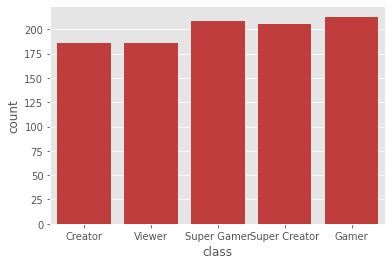

In [7]:
sns.countplot(data=users,x="class",color="tab:red")

In [8]:

# import module
from geopy.geocoders import Nominatim

# initialize Nominatim API 
geolocator = Nominatim(user_agent="geoapiExercises")


# Latitude & Longitude input
Latitude = "25.594095"
Longitude = "85.137566"

def get_location(lat,lng):
    location = geolocator.reverse(lat+","+lng)
    loc = location.raw
    loc_dict = location.raw
    return loc_dict['address']['country']
  
get_location(Latitude,Longitude)

'India'

In [9]:
## lat,long
users['lat']=users['coordinates'].str.split("'").str[1]
users['lng']=users['coordinates'].str.split("'").str[3]

In [10]:
def f(x):    
    return get_location(x['lat'],x['lng']) 

In [11]:
country=[]
for i, row in users.iterrows():
    country.append(get_location(row['lat'],row['lng']))
    if i%100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900


In [12]:
users['country'] = country

#### User count by country

<AxesSubplot:xlabel='country', ylabel='total_users'>

/Users/kmanchanda/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kmanchanda/opt/anaconda3/envs/newenv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


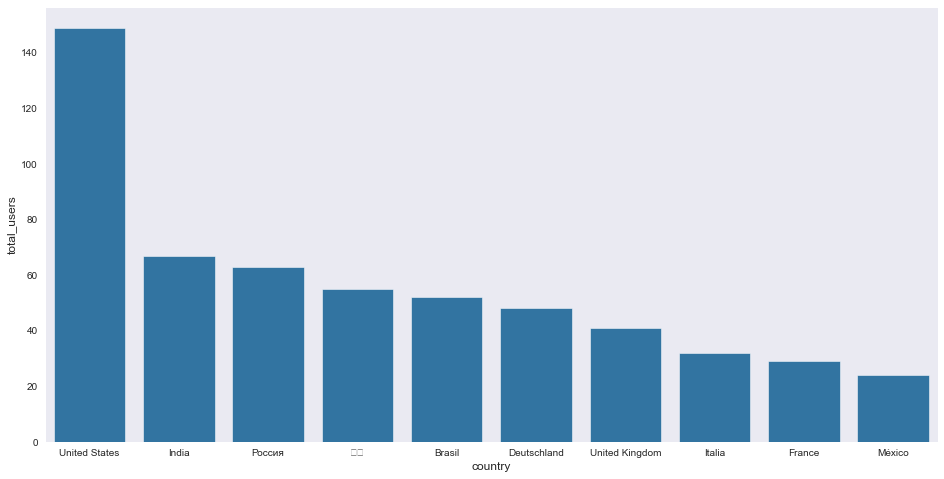

In [13]:
top_10_countries = users.groupby(["country"]).agg(total_users=("id","count")).sort_values(by="total_users",ascending=False).reset_index(drop=False).head(10)
sns.set_style("dark")
plt.figure(figsize=(16,8))
sns.barplot(data=top_10_countries,x="country",y="total_users",color="tab:blue")



In [14]:
top_10_countries

,country,total_users
0,United States,149
1,India,67
2,Россия,63
3,中国,55
4,Brasil,52
5,Deutschland,48
6,United Kingdom,41
7,Italia,32
8,France,29
9,México,24


## Videos

In [15]:
def categorical_fields_analysis(df=videos,x=None,y=None):
    grp = df.groupby([x]).size()
    print(grp)
    print("----------------------------------")
    print(pd.crosstab(df[x], df[y]))
    print("----------------------------------")
    print(pd.crosstab(df[x], df[y]).apply(lambda r: r/r.sum(), axis=1))
    print(stats.chi2_contingency(pd.crosstab(df[x], df[y])))
    if len(df[x].unique()) > 5:
        plt.figure(figsize=(12, 8))
    sns.barplot(x=df[x], y=df[y])
    
    #The two samples are independent
    #The variables were collected independently of each other, i.e. the answer from one variable was not dependent on the answer of the other
    #No expected cell count is = 0
    #No more than 20% of the cells have and expected cell count < 5

    #1st value- chisquare test static,
    #2nd value- p-value
    #3rd value- degrees of freedom

In [16]:
def categorical_groups_mean(df=videos,x=None,y=None,levs =[True,False]):
    grp = df.groupby([x]).agg(avg=(y,np.mean))
    print(grp)
    print("----------------------------------")
    grp1 = df[df[x] == True][y]
    grp2 = df[df[x] == False][y]
    print(stats.ttest_ind(grp1,grp2))
    sns.barplot(x=df[x], y=df[y])

#### AR Users

<AxesSubplot:xlabel='is_ar', ylabel='count'>

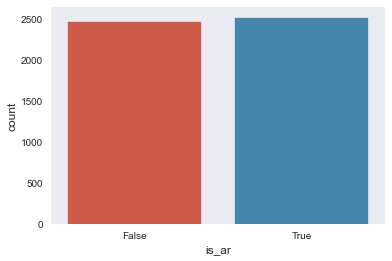

In [17]:
sns.countplot(data=videos,x="is_ar")

Avg num of shares and duration

In [18]:
videos.agg(avg_shares = ("num_shares",np.mean),avg_duration = ("duration",np.mean))

,num_shares,duration
avg_shares,9.8488,NaN
avg_duration,NaN,4.536508


Num shares vs is AR?

            avg
is_ar          
False  9.845469
True   9.852057
----------------------------------
Ttest_indResult(statistic=0.0388410852920588, pvalue=0.9690186394919718)


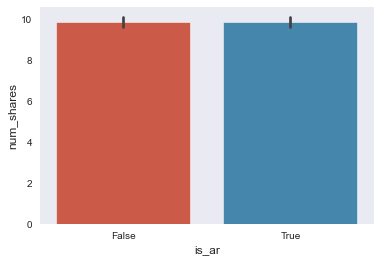

In [19]:
categorical_groups_mean(videos,x="is_ar",y="num_shares")

Video length vs is AR?

            avg
is_ar          
False  4.524345
True   4.548402
----------------------------------
Ttest_indResult(statistic=0.6062932444767929, pvalue=0.5443475788599319)


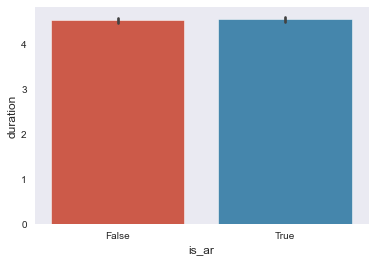

In [20]:
categorical_groups_mean(videos,x="is_ar",y="duration")

## Watched Video

OS vs Watch time

              avg
os               
Android  3.404880
iOS      3.415596
----------------------------------
Ttest_indResult(statistic=-0.6517629456031229, pvalue=0.51455710489615)


<AxesSubplot:xlabel='os', ylabel='duration'>

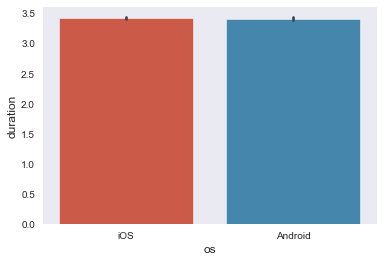

In [21]:
grp = watchedVideo.groupby(["os"]).agg(avg=("duration",np.mean))
print(grp)
print("----------------------------------")
grp1 = watchedVideo[watchedVideo["os"] == "Android"]["duration"]
grp2 = watchedVideo[watchedVideo["os"] == "iOS"]["duration"]
print(stats.ttest_ind(grp1,grp2))
sns.barplot(x=watchedVideo["os"], y=watchedVideo["duration"])

### Client version by watch time

In [22]:
grp = watchedVideo.groupby(["os","appVersion"]).agg(avg=("duration",np.mean))
print(grp)

                         avg
os      appVersion          
Android 2.1.0       3.409386
        2.1.1       3.370895
        2.1.2       3.432893
        2.2.0       3.393963
        2.2.1       3.458255
        2.2.2       3.381167
        2.2.3       3.431936
        2.2.4       3.370287
        3.0.0       3.420681
        3.0.1       3.376108
iOS     2.1.0       3.371258
        2.1.1       3.416962
        2.1.2       3.425622
        2.2.0       3.382604
        2.2.1       3.460888
        2.2.2       3.372115
        2.2.3       3.496770
        2.2.4       3.407705
        3.0.0       3.423236
        3.0.1       3.396119


Merge all data

In [23]:
videosDetailed = watchedVideo.drop('Unnamed: 0',axis=1).merge(videos.drop('Unnamed: 0',axis=1),left_on="videoId",right_on="id")

# videosDetailed.head()


### Video Completion

In [98]:
videosDetailed['%complete'] = videosDetailed['duration_x']/videosDetailed['duration_y']
# videosDetailed.head()

% completion vs is AR?

            avg
is_ar          
False  0.750969
True   0.753013
----------------------------------
Ttest_indResult(statistic=0.7202749627490637, pvalue=0.47135908425575623)


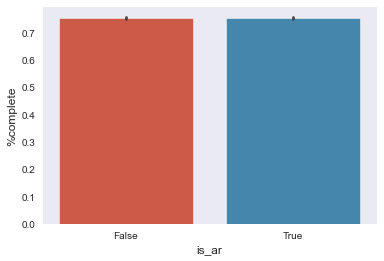

In [99]:
categorical_groups_mean(df=videosDetailed,x="is_ar",y="%complete")

              avg
os               
Android  0.751038
iOS      0.752977
----------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)


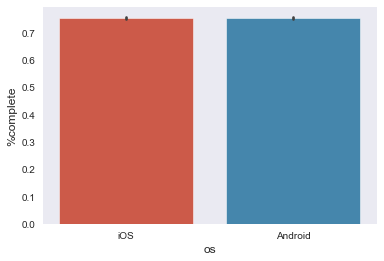

In [100]:
categorical_groups_mean(df=videosDetailed,x="os",y="%complete")

## Feeds

In [101]:
feedDetailed = videosDetailed.merge(feeds,left_on="feedId",right_on="id")

Watch time for feeds

In [102]:
feedDetailed['watch_time_music'] = feedDetailed[feedDetailed.name == "music"]["duration_x"]
feedDetailed['watch_time_fashion'] = feedDetailed[feedDetailed.name == "fashion"]["duration_x"]
feedDetailed['watch_time_sports'] = feedDetailed[feedDetailed.name == "sports"]["duration_x"]
feedDetailed['watch_time_games'] = feedDetailed[feedDetailed.name == "games"]["duration_x"]
feedDetailed['watch_time_travel'] = feedDetailed[feedDetailed.name == "travel"]["duration_x"]
feedDetailed['watch_time_fun'] = feedDetailed[feedDetailed.name == "fun"]["duration_x"]
feedDetailed['watch_time_jokes'] = feedDetailed[feedDetailed.name == "jokes"]["duration_x"]
feedDetailed['watch_time_love'] = feedDetailed[feedDetailed.name == "love"]["duration_x"]
feedDetailed['watch_time_dance'] = feedDetailed[feedDetailed.name == "dance"]["duration_x"]
feedDetailed['watch_time_beaches'] = feedDetailed[feedDetailed.name == "beaches"]["duration_x"]
feedDetailed = feedDetailed.fillna(0)

Completion by feed type

              avg
name             
beaches  0.750236
dance    0.756561
fashion  0.753044
fun      0.761068
games    0.749173
jokes    0.744712
love     0.752239
music    0.756087
sports   0.744453
travel   0.752457
----------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)


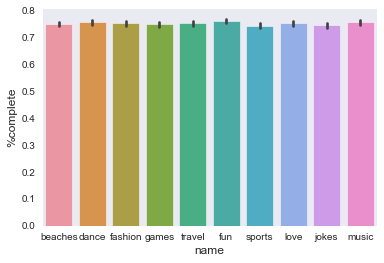

In [103]:
categorical_groups_mean(df=feedDetailed,x="name",y="%complete")

Feed type vs Number of shares

              avg
name             
beaches  9.763023
dance    9.885475
fashion  9.832486
fun      9.919783
games    9.739627
jokes    9.929059
love     9.851994
music    9.836280
sports   9.903927
travel   9.977469
----------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)


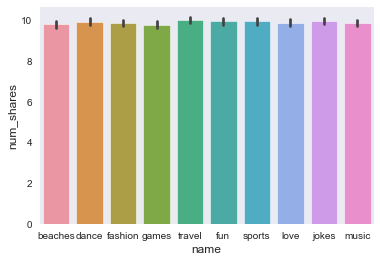

In [104]:
categorical_groups_mean(df=feedDetailed,x="name",y="num_shares")

Watch time by feed type

              avg
name             
beaches  3.407179
dance    3.389798
fashion  3.434941
fun      3.463030
games    3.416779
jokes    3.389546
love     3.426485
music    3.431726
sports   3.351782
travel   3.391514
----------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)


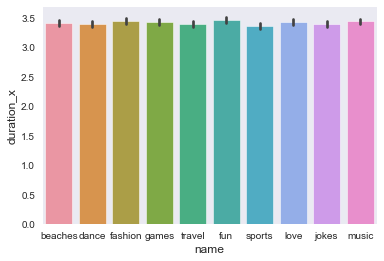

In [105]:
categorical_groups_mean(df=feedDetailed,x="name",y="duration_x")

Completion vs Duration

<AxesSubplot:xlabel='duration_y', ylabel='%complete'>

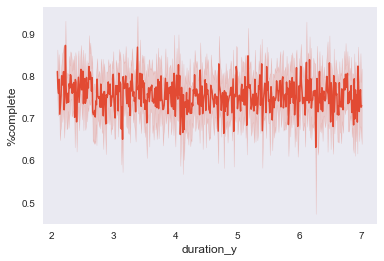

In [106]:
sns.lineplot(data=feedDetailed,x="duration_y",y="%complete",estimator = "mean")

#### Binning Duration to reduce noise

In [107]:
def create_bin_discretizer(df, var):
    np.random.seed(5)
    #initialize bin discretizer object
    discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans')
    
    # fit the discretizer to the train set
    discretizer.fit(df[var].values.reshape(-1, 1))
    print("Bin edges:",discretizer.bin_edges_ )
    #save the bin discretizer object
    filename=var+'.pkl'
    filehandler = open(filename, 'wb') 
    pickle.dump(discretizer, filehandler)

#apply bin dicretizer
def bin_discretizer(df, var):
    #------------------------------------------------------------------------------
#     #create bins for original data
#     # histogram of the raw data
#     pyplot.hist(df[var])
#     pyplot.show()
    
    #read relevant discretizer
    filename=var+'.pkl'
    filehandler = open(filename, 'rb') 
    discretizer = pickle.load(filehandler)

    # apply the discretisation on train
    t = df[var].values.reshape(-1, 1)
    t = discretizer.transform(t)
    t = pd.DataFrame(t, index=df.index)
    t.columns = [(var+'_bin')]
    colname = var+'_bin'
    if colname in df.columns:
        df = df.drop(colname,axis=1)
    df = pd.concat([df, t], axis=1)
    return df

<AxesSubplot:xlabel='num_shares', ylabel='%complete'>

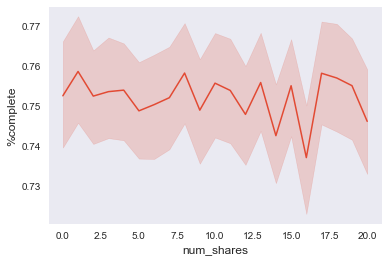

In [108]:
sns.lineplot(data=feedDetailed,x="num_shares",y="%complete")

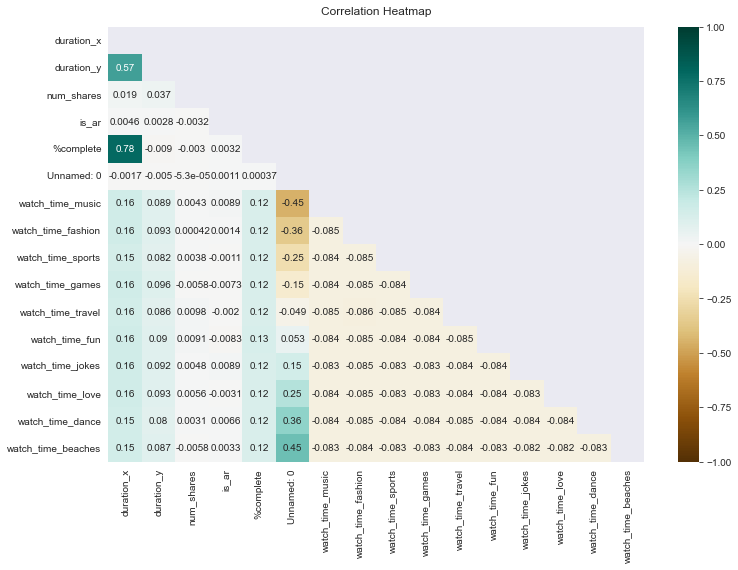

In [109]:
#check correlation between continuous variables
plt.figure(figsize=(12, 8))

corr = feedDetailed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))


heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True,cmap='BrBG',mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

## User Type

In [110]:
detailed = feedDetailed.merge(users,left_on="userId",right_on="id")

Watch time vs class

                    avg
class                  
Creator        3.395844
Gamer          3.429358
Super Creator  3.401150
Super Gamer    3.423032
Viewer         3.397948
----------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)


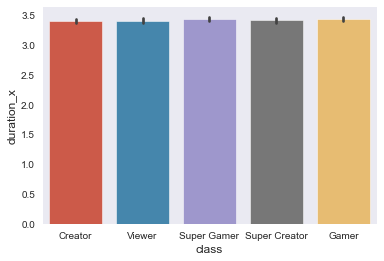

In [111]:
categorical_groups_mean(df=detailed,x="class",y="duration_x")

In [112]:
top10_data = detailed[detailed.country.isin(top_10_countries.country)]

Number of shares vs Completion Rate

<AxesSubplot:xlabel='num_shares', ylabel='duration_x'>

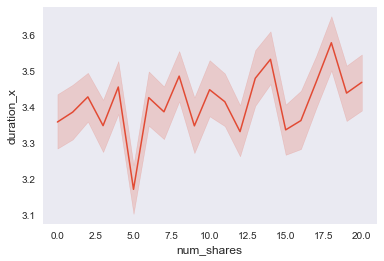

In [113]:
sns.lineplot(data=detailed,x="num_shares",y="duration_x")

### Game id

<AxesSubplot:xlabel='game_id', ylabel='duration_y'>

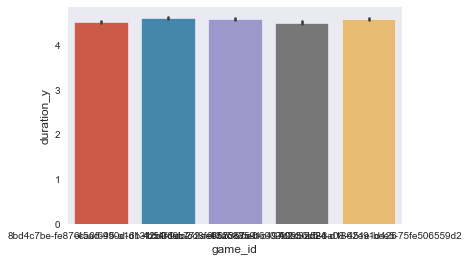

In [114]:
sns.barplot(data=detailed,x="game_id",y="duration_y")

### Completion vs watch time

In [115]:
create_bin_discretizer(detailed,'duration_y')
detailed = bin_discretizer(detailed,'duration_y')
# sns.countplot(data=detailed,x="duration_y_bin",color="tab:blue")

Bin edges: [array([2.1       , 2.71208543, 3.32664984, 3.93869895, 4.55058528,
       5.16353393, 5.75756259, 6.3620168 , 7.        ])]


In [116]:
create_bin_discretizer(detailed,'num_shares')
detailed = bin_discretizer(detailed,'num_shares')
# sns.countplot(data=detailed,x="num_shares_bin",color="tab:blue")

Bin edges: [array([ 0.        ,  2.55038411,  5.26363281,  7.73248687, 10.25342526,
       12.78208981, 15.28410569, 17.76047351, 20.        ])]


<AxesSubplot:xlabel='num_shares_bin', ylabel='duration_x'>

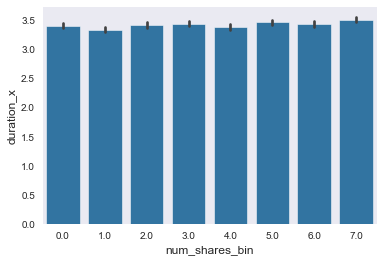

In [117]:

sns.barplot(data=detailed,x="num_shares_bin",y="duration_x",color="tab:blue")

In [118]:
create_bin_discretizer(detailed,'duration_x')
detailed = bin_discretizer(detailed,'duration_x')
# sns.countplot(data=detailed,x="duration_x_bin",color="tab:blue")

Bin edges: [array([0.1       , 0.96859623, 1.861838  , 2.70914642, 3.52691932,
       4.38429456, 5.2482519 , 6.11788914, 7.        ])]


<AxesSubplot:xlabel='duration_x_bin', ylabel='%complete'>

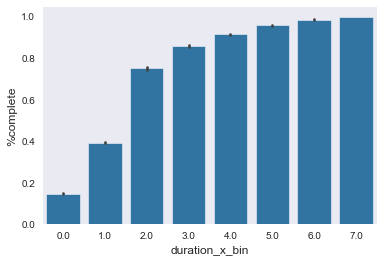

In [119]:
sns.barplot(data=detailed,x="duration_x_bin",y="%complete",color="tab:blue")

<AxesSubplot:xlabel='duration_y_bin', ylabel='%complete'>

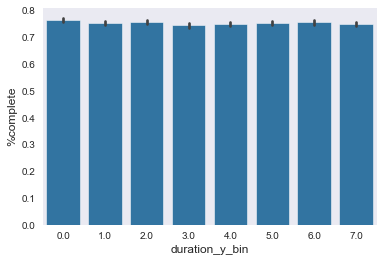

In [120]:
sns.barplot(data=detailed,x="duration_y_bin",y="%complete",color="tab:blue")

### Variance

<AxesSubplot:xlabel='duration_x_bin', ylabel='var'>

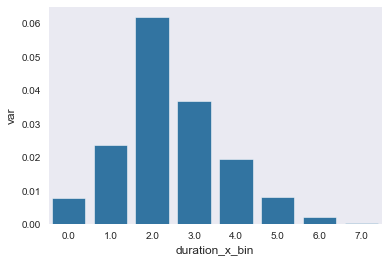

In [121]:
df = detailed.groupby(["duration_x_bin"]).agg(var = ("%complete",np.var)).reset_index(drop=False)
sns.barplot(data=df,x="duration_x_bin",y="var",color="tab:blue")

<AxesSubplot:xlabel='duration_y_bin', ylabel='var'>

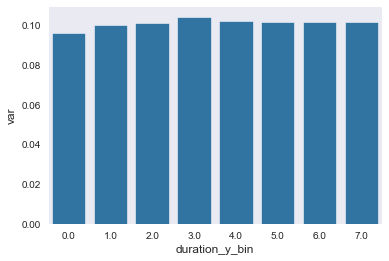

In [122]:
df = detailed.groupby(["duration_y_bin"]).agg(var = ("%complete",np.var)).reset_index(drop=False)
sns.barplot(data=df,x="duration_y_bin",y="var",color="tab:blue")

<AxesSubplot:xlabel='num_shares_bin', ylabel='var'>

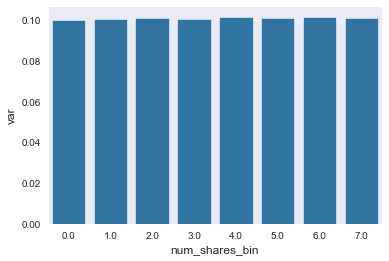

In [123]:
df = detailed.groupby(["num_shares_bin"]).agg(var = ("%complete",np.var)).reset_index(drop=False)
sns.barplot(data=df,x="num_shares_bin",y="var",color="tab:blue")

In [ ]:
sns.barplot(data=detailed,x="%complete",y="duration_y",color="tab:blue")

<AxesSubplot:xlabel='%complete', ylabel='duration_y'>

Feed vs completion rate

## Aggregated at user level

In [ ]:
userDetailed = detailed.groupby(['userId','class']).agg(
    total_watch_time = ("duration_x",np.sum),avg_completion = ("%complete",np.mean)
                           ,avg_ar = ("is_ar",np.mean)
        ,avg_shares = ("num_shares",np.mean)
                ,total_videos_watched = ("videoId","count")
    ,avg_watch_time = ("duration_x",np.mean)
    ,avg_video_length = ("duration_y",np.mean)
,watch_time_music = ("watch_time_music",np.sum)
,watch_time_fashion = ("watch_time_fashion",np.sum)
,watch_time_sports = ("watch_time_sports",np.sum)
,watch_time_games = ("watch_time_games",np.sum)
,watch_time_travel = ("watch_time_travel",np.sum)
,watch_time_fun = ("watch_time_fun",np.sum)
,watch_time_jokes = ("watch_time_jokes",np.sum)
,watch_time_love = ("watch_time_love",np.sum)
,watch_time_dance = ("watch_time_dance",np.sum)
,watch_time_beaches = ("watch_time_beaches",np.sum)
).reset_index(drop=False)
    
userDetailed['%fashion'] = userDetailed['watch_time_fashion']/userDetailed['total_watch_time']
userDetailed['%music'] = userDetailed['watch_time_music']/userDetailed['total_watch_time']
userDetailed['%sports'] = userDetailed['watch_time_sports']/userDetailed['total_watch_time']
userDetailed['%games'] = userDetailed['watch_time_games']/userDetailed['total_watch_time']
userDetailed['%travel'] = userDetailed['watch_time_travel']/userDetailed['total_watch_time']
userDetailed['%fun'] = userDetailed['watch_time_fun']/userDetailed['total_watch_time']
userDetailed['%jokes'] = userDetailed['watch_time_jokes']/userDetailed['total_watch_time']
userDetailed['%love'] = userDetailed['watch_time_love']/userDetailed['total_watch_time']
userDetailed['%dance'] = userDetailed['watch_time_dance']/userDetailed['total_watch_time']
userDetailed['%beaches'] = userDetailed['watch_time_beaches']/userDetailed['total_watch_time']
#  = 

In [ ]:
#check correlation between continuous variables
plt.figure(figsize=(12, 8))

corr = userDetailed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))


heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True,cmap='BrBG',mask=mask)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [ ]:
create_bin_discretizer(userDetailed,'avg_completion')
userDetailed = bin_discretizer(userDetailed,'avg_completion')
sns.barplot(data=userDetailed,x="avg_completion_bin",y="total_watch_time",color="tab:blue")

In [ ]:
sns.barplot(data=userDetailed,x="avg_completion_bin",y="total_videos_watched",color="tab:blue")

#### Favourite feed

In [ ]:
userDetailed['fav_feed'] = userDetailed[['%fashion', '%music',
       '%sports', '%games', '%travel', '%fun', '%jokes', '%love', '%dance',
       '%beaches']].idxmax(axis=1)

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=userDetailed,x="class",hue="fav_feed")

In [ ]:
sns.barplot(data=userDetailed,x="fav_feed",y="avg_video_length")